In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
plt.style.use("seaborn")
sns.set(style="white")


In [129]:
df = pd.read_csv("./data/delitos_2016-2019.csv")
df["anio"]=df.fecha.str[:4]
df["periodo"]=df.fecha.str[:7]
df.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,anio,periodo
0,51585,2016-01-01,13,Robo (con violencia),NaN,1.0,9.0,Parque Avellaneda,-34.648730,-58.468536,2016,2016-01
1,83256,2016-01-01,22,Robo (con violencia),NaN,1.0,14.0,Palermo,-34.576925,-58.407400,2016,2016-01
2,117697,2016-01-01,1,Lesiones,Siniestro Vial,1.0,4.0,Parque Patricios,-34.645197,-58.401099,2016,2016-01
3,43088,2016-01-01,19,Hurto (sin violencia),NaN,1.0,9.0,Parque Avellaneda,-34.655760,-58.478681,2016,2016-01
4,68588,2016-01-01,4,Robo (con violencia),Robo Automotor,1.0,6.0,Caballito,-34.624128,-58.436826,2016,2016-01


In [130]:
df.describe()

,id,cantidad_registrada,comuna,lat,long
count,488541.000000,488541.000000,480177.000000,480177.000000,480177.000000
mean,244271.000000,1.000076,7.311092,-34.612124,-58.435693
std,141029.783268,0.010015,4.624267,0.029769,0.042851
min,1.000000,1.000000,1.000000,-34.704009,-58.531336
25%,122136.000000,1.000000,3.000000,-34.631635,-58.469251
50%,244271.000000,1.000000,7.000000,-34.610309,-58.433122
75%,366406.000000,1.000000,12.000000,-34.593083,-58.400558
max,488541.000000,4.000000,15.000000,-34.528497,-58.341017


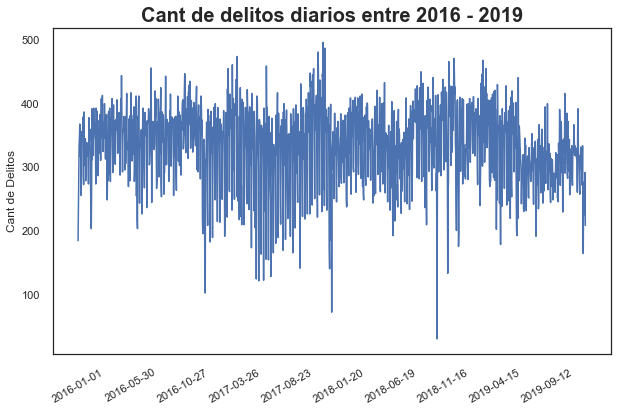

In [131]:
df_dia = df[['fecha','cantidad_registrada']].groupby(['fecha']).agg("sum").reset_index()

f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_dia, x='fecha', y='cantidad_registrada')
plt.title("Cant de delitos diarios entre 2016 - 2019",fontsize=20,fontweight="bold")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(plt.MaxNLocator(16))
plt.xlabel(None)
plt.ylabel("Cant de Delitos")
plt.show()

## Tipo de delito en 2019

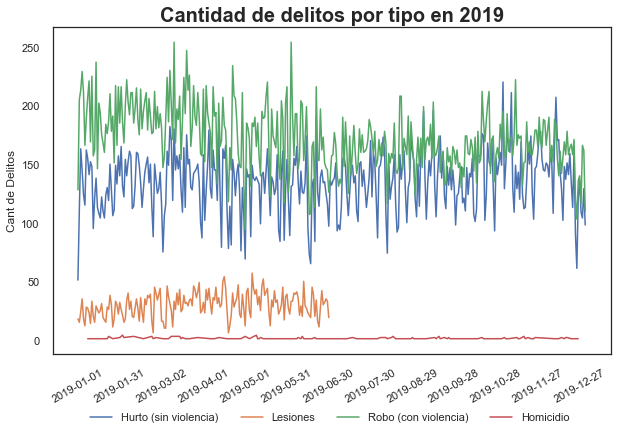

In [132]:

df_tipo = df[['fecha','cantidad_registrada', 'tipo_delito']][df.anio == '2019'].groupby(['fecha', 'tipo_delito']).agg("sum").reset_index()


f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_tipo, x='fecha', y='cantidad_registrada', hue='tipo_delito')
plt.title("Cantidad de delitos por tipo en 2019",fontsize=20,fontweight="bold")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(plt.MaxNLocator(16))
plt.xlabel(None)
plt.ylabel("Cant de Delitos")
ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.15),
          fancybox=True, shadow=True, ncol=5).texts[0].set_text(None)
plt.show()

## Barios con más delitos en 2019

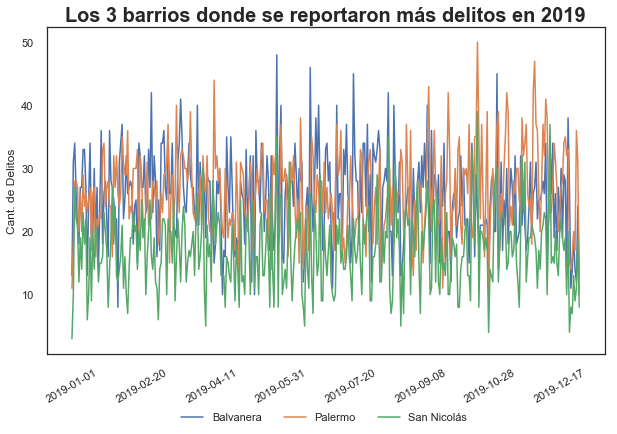

In [133]:
df_barrios = df[['cantidad_registrada','barrio']][df.anio == '2019'].groupby(['barrio']).agg("sum").reset_index()
df_barrios.sort_values(by=["cantidad_registrada"],ascending=False, inplace=True)
barrios_top=df_barrios[:3]


df_top_barrios=df[df['barrio'].isin(list(barrios_top["barrio"]))]
top = df_top_barrios[['fecha','cantidad_registrada','barrio']][df_top_barrios.anio == '2019'].groupby(['fecha','barrio']).agg("sum").reset_index()


f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=top, x='fecha', y='cantidad_registrada',hue="barrio")
plt.title("Los 3 barrios donde se reportaron más delitos en 2019",fontsize=20,fontweight="bold")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel(None)
plt.ylabel("Cant. de Delitos")
ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.15),
          fancybox=True, shadow=True, ncol=5).texts[0].set_text(None)

plt.show()

## Delitos por franja horaria 2019

In [134]:
hora = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','S/D']
franja = ['Madrugada','Madrugada','Madrugada','Madrugada','Madrugada','Madrugada','Mañana','Mañana','Mañana','Mañana','Mañana',
          'Mañana','Tarde','Tarde','Tarde','Tarde','Tarde','Tarde','Noche','Noche','Noche','Noche','Noche','Noche','N/R']

data = {'hora':hora,'franja':franja}
df_2 = pd.DataFrame(data)  

df_merge = pd.merge(left=df, right=df_2, left_on='franja_horaria', right_on='hora')

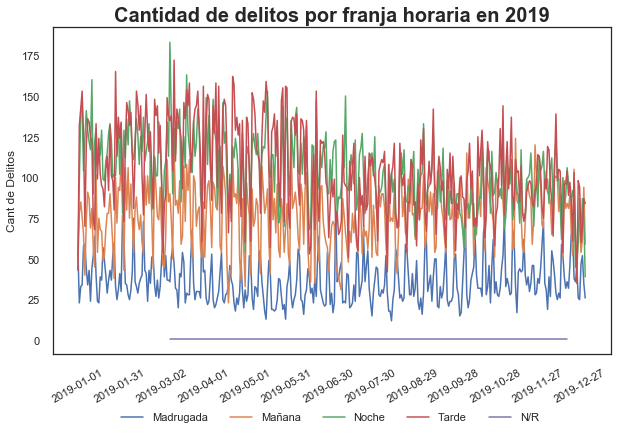

In [135]:
df_franja = df_merge[['fecha','cantidad_registrada', 'franja']][df_merge.anio == '2019'].groupby(['fecha', 'franja']).agg("sum").reset_index()

f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_franja, x='fecha', y='cantidad_registrada', hue='franja')
plt.title("Cantidad de delitos por franja horaria en 2019",fontsize=20,fontweight="bold")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(plt.MaxNLocator(16))
plt.xlabel(None)
plt.ylabel("Cant de Delitos")
ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.15),
          fancybox=True, shadow=True, ncol=6).texts[0].set_text(None)
plt.show()
